# <center>Part3 Depth from Stereo
# <center>LI HAIPENG A0260034W

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gco import pygco 
import cv2

def dist(c1, c2):
    return (abs(float(c1[0])-float(c2[0]))+abs(float(c1[1])-float(c2[1]))+abs(float(c1[2])-float(c2[2])))/3
# def dist(patch1, patch2):
#     pixel_count = patch1.size
#     _patch1 = patch1.flatten()
#     _patch2 = patch2.flatten()
#     value = 0.0
#     for i in range(pixel_count):
#         value += abs(float(_patch1[i]) - float(_patch2[i]))
#     return value/pixel_count    

#=======================================================
# get camera matrix
cam_matrix = np.loadtxt('cameras.txt', dtype=np.float32)
K1 = cam_matrix[0:3, 0:3]
R1 = cam_matrix[3:6, 0:3]
T1 = cam_matrix[6:7, 0:3].T
K2 = cam_matrix[7:10, 0:3]
R2 = cam_matrix[10:13, 0:3]
T2 = cam_matrix[13:14, 0:3].T

# read images
img1 = cv2.imread('Img/test00.jpg')
img2 = cv2.imread('Img/test09.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

H1 = img1.shape[0]
W1 = img1.shape[1]
H2 = img2.shape[0]
W2 = img2.shape[1]

# parameters setting
d_min = 0
d_max = 0.01
d_num = 50
levels = d_num + 1
d = np.linspace(d_min,d_max,levels)

#prior term
pairwise = (1 - np.eye(d_num))

#data term
unary = np.zeros([H1, W1, d_num])
term1 = K2 @ R2 @ R1.T @ np.linalg.inv(K1)
term2 = K2 @ R2 @ (T1-T2)


In [2]:
for y in range(0, H1):
    for x in range(0, W1):
        xh = np.array([[x], [y], [1]])
        for i in range(0, d_num):
            coord = term1 @ xh + d[i+1] * term2
            coord = np.round(coord/coord[2])
            if coord[1]<0:
                coord[1] = 0
            if coord[1]>=H1:
                coord[1] = H1-1
            if coord[0]<0:
                coord[0] = 0
            if coord[0]>=W1:
                coord[0] = W1-1
            
            c1 = img1[y][x]
            c2 = img2[int(coord[1])][int(coord[0])]
#             if 0<=coord[1]<H1 and 0<=coord[0]<W1:
#                 unary[y][x][i] = sum(abs(img1[y, x, :] - img2[int(coord[1]), int(coord[0]), :]))/255
                
            unary[y][x][i] = dist(c1, c2) / 255

## m_lambda = 0.001

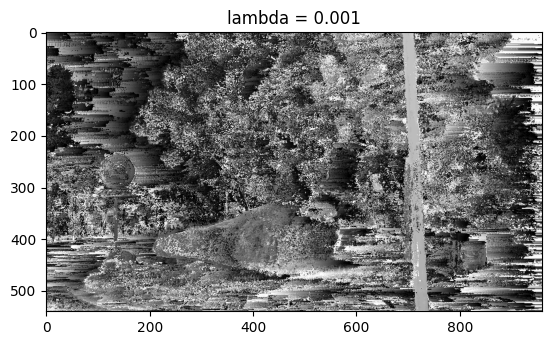

In [7]:
m_lambda = 0.001
label0 = pygco.cut_grid_graph_simple(unary, pairwise*m_lambda, n_iter=-1)
label0 = label0.reshape(H1, W1)
plt.imshow(label0, cmap='gray')
plt.title('lambda = 0.001')
plt.show()

## m_lambda = 0.01

In [3]:
m_lambda = 0.01
label1 = pygco.cut_grid_graph_simple(unary, pairwise*m_lambda, n_iter=-1)
label1 = label1.reshape(H1, W1)

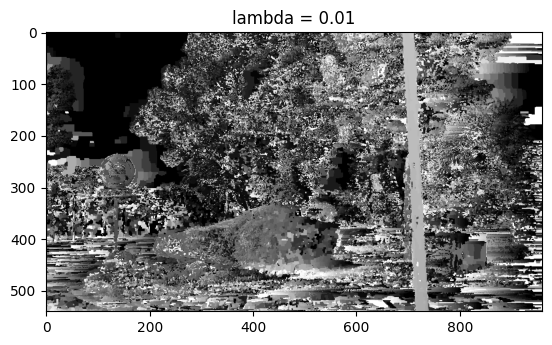

In [4]:
plt.imshow(label1, cmap='gray')
plt.title('lambda = 0.01')
plt.show()

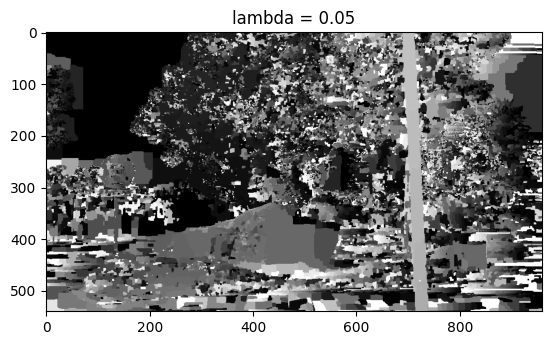

In [15]:
m_lambda = 0.05
label2 = pygco.cut_grid_graph_simple(unary, pairwise * m_lambda, n_iter=-1)
label2 = label2.reshape(H1, W1)
        
plt.imshow(label2, cmap='gray')
plt.title('lambda = 0.05')
plt.show()

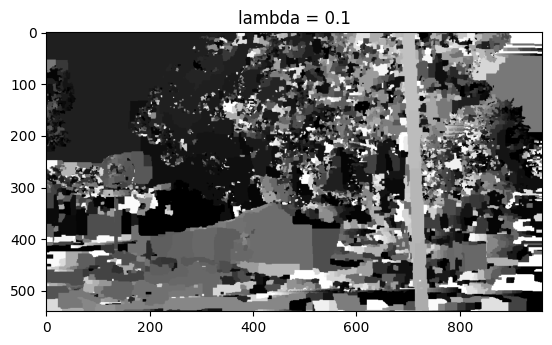

In [5]:
m_lambda = 0.1
label2 = pygco.cut_grid_graph_simple(unary, pairwise * m_lambda, n_iter=-1)
label2 = label2.reshape(H1, W1)
        
plt.imshow(label2, cmap='gray')
plt.title('lambda = 0.1')
plt.show()

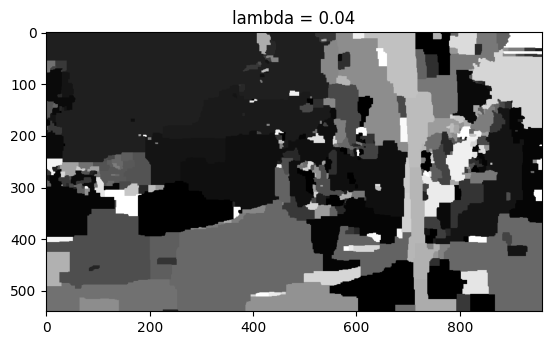

In [13]:
m_lambda = 0.4
label3 = pygco.cut_grid_graph_simple(unary, pairwise * m_lambda, n_iter=-1)
label3 = label3.reshape(H1, W1)
        
plt.imshow(label3, cmap='gray')
plt.title('lambda = 0.04')
plt.show()

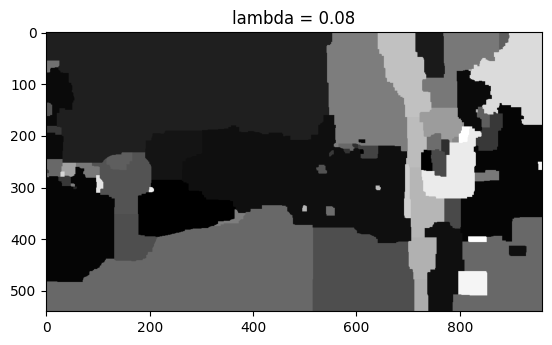

In [14]:
m_lambda = 0.8
label3 = pygco.cut_grid_graph_simple(unary, pairwise * m_lambda, n_iter=-1)
label3 = label3.reshape(H1, W1)
        
plt.imshow(label3, cmap='gray')
plt.title('lambda = 0.08')
plt.show()

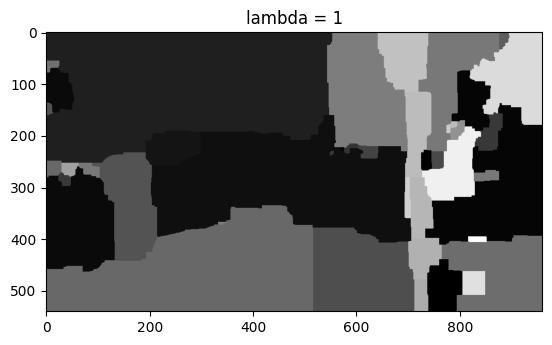

In [6]:
m_lambda = 1
label3 = pygco.cut_grid_graph_simple(unary, pairwise * m_lambda, n_iter=-1)
label3 = label3.reshape(H1, W1)
        
plt.imshow(label3, cmap='gray')
plt.title('lambda = 1')
plt.show()

### When lambda bigger, the depth map will be more blur. The best result is lambed=0.01. As the same with Part2, the edge of the result is not good because of the loss of information.